In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/image_classification_dataset/IMAGE_CLASSIFICATION

/content/drive/MyDrive/image_classification_dataset/IMAGE_CLASSIFICATION


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)


1.15.2


In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/image_classification_dataset/IMAGE_CLASSIFICATION/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)


{'AMAZON_TROUSERS': 0, 'AMAZON_JEANS': 1, 'AMAZON_SAREE': 2}
['AMAZON_TROUSERS', 'AMAZON_JEANS', 'AMAZON_SAREE']
[0, 1, 2]


In [8]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [9]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [10]:
new_target.shape


(862, 3)

In [11]:
data.shape


(862, 100, 100, 3)

In [22]:
data.shape[1:]


(100, 100, 3)

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with two outputs for three categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [24]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [25]:
train_data.shape


(775, 100, 100, 3)

In [26]:
train_target.shape


(775, 3)

In [27]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)


Train on 620 samples, validate on 155 samples
Epoch 1/200
620/620 [==============================] - 52s 84ms/step - loss: 1.0300 - accuracy: 0.4968 - val_loss: 0.5196 - val_accuracy: 0.6774
Epoch 2/200
620/620 [==============================] - 51s 82ms/step - loss: 0.5334 - accuracy: 0.7355 - val_loss: 0.4883 - val_accuracy: 0.7548
Epoch 3/200
620/620 [==============================] - 51s 83ms/step - loss: 0.4387 - accuracy: 0.8016 - val_loss: 0.3627 - val_accuracy: 0.8258
Epoch 4/200
620/620 [==============================] - 51s 82ms/step - loss: 0.3489 - accuracy: 0.8387 - val_loss: 0.4563 - val_accuracy: 0.7677
Epoch 5/200
620/620 [==============================] - 50s 81ms/step - loss: 0.3659 - accuracy: 0.8274 - val_loss: 0.3978 - val_accuracy: 0.8065
Epoch 6/200
620/620 [==============================] - 51s 81ms/step - loss: 0.2820 - accuracy: 0.8710 - val_loss: 0.3945 - val_accuracy: 0.8194
Epoch 7/200
620/620 [==============================] - 51s 81ms/step - loss: 0.2507

In [28]:
model.save('model.h5')


In [29]:
from matplotlib import pyplot as plt

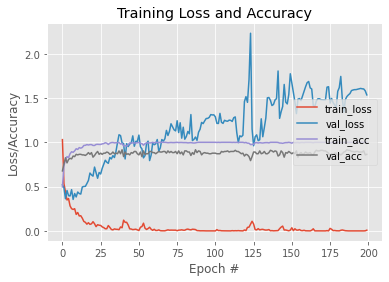

In [30]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [60]:
#data image visualisation

In [57]:
def plot_sample(X, y, index):
    plt.figure(figsize = (100,100))
    plt.imshow(X[index])
   

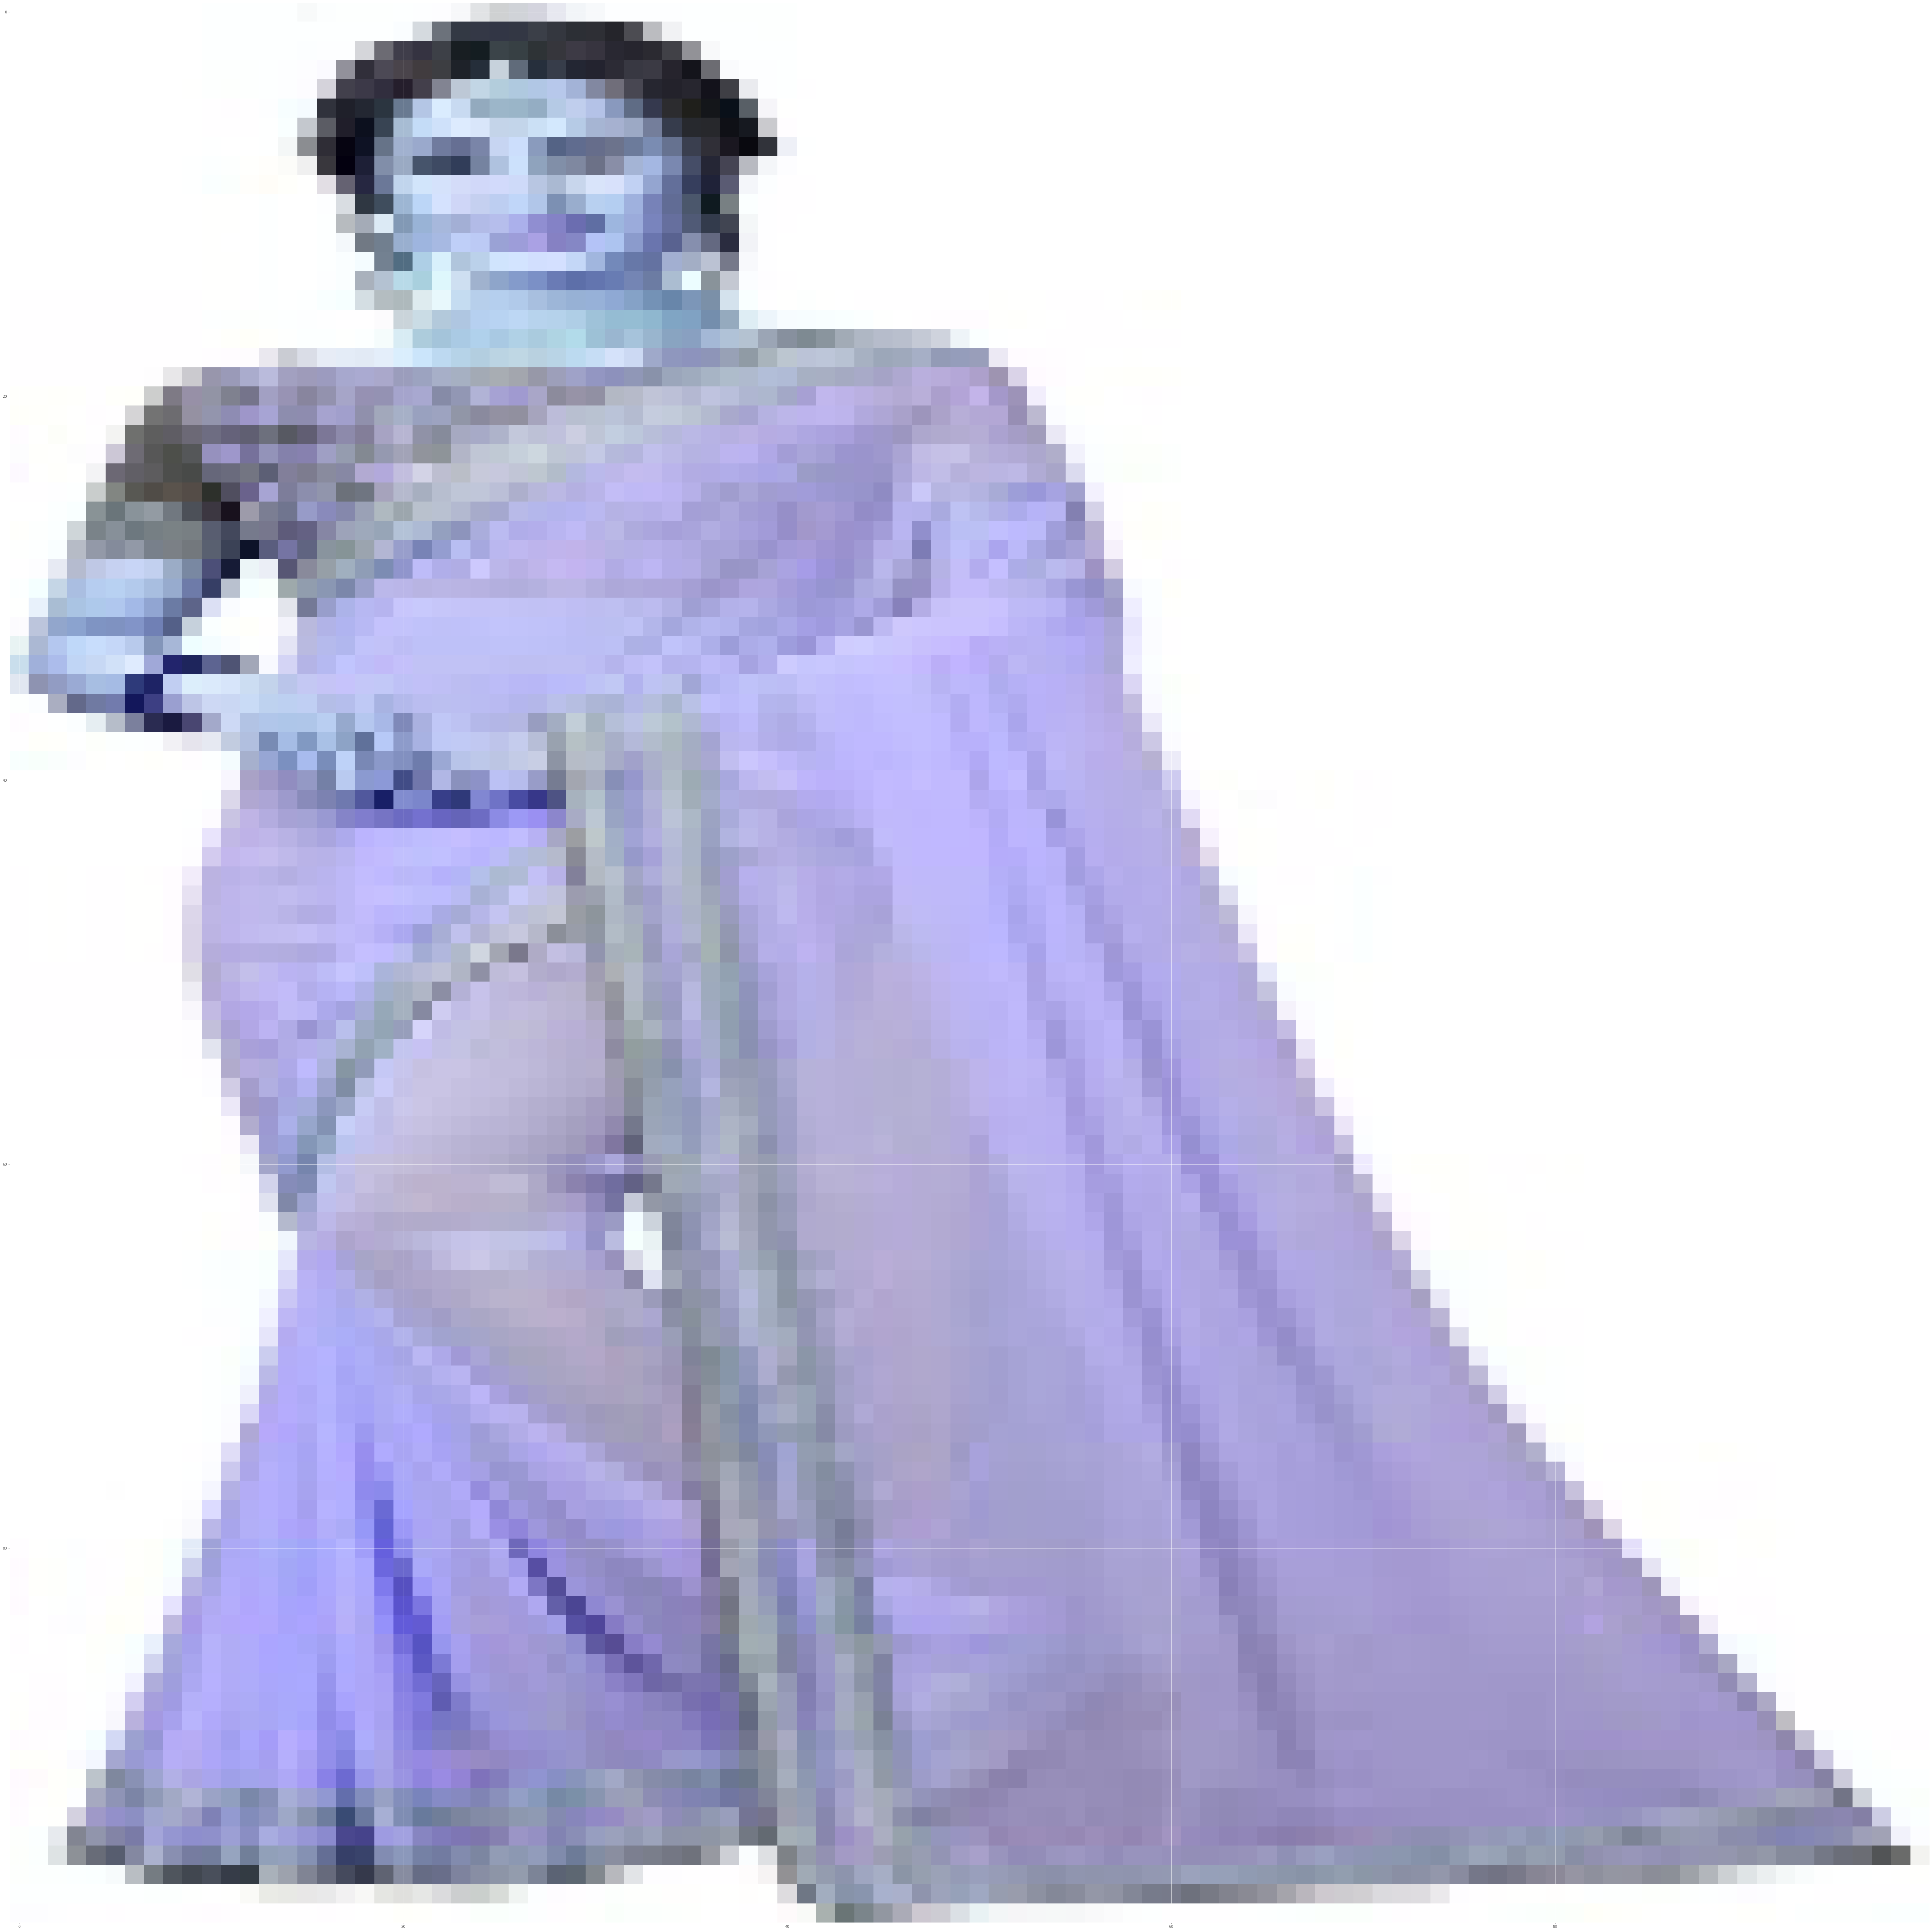

In [58]:
#visualize sample data
plot_sample(train_data, train_target, 0)

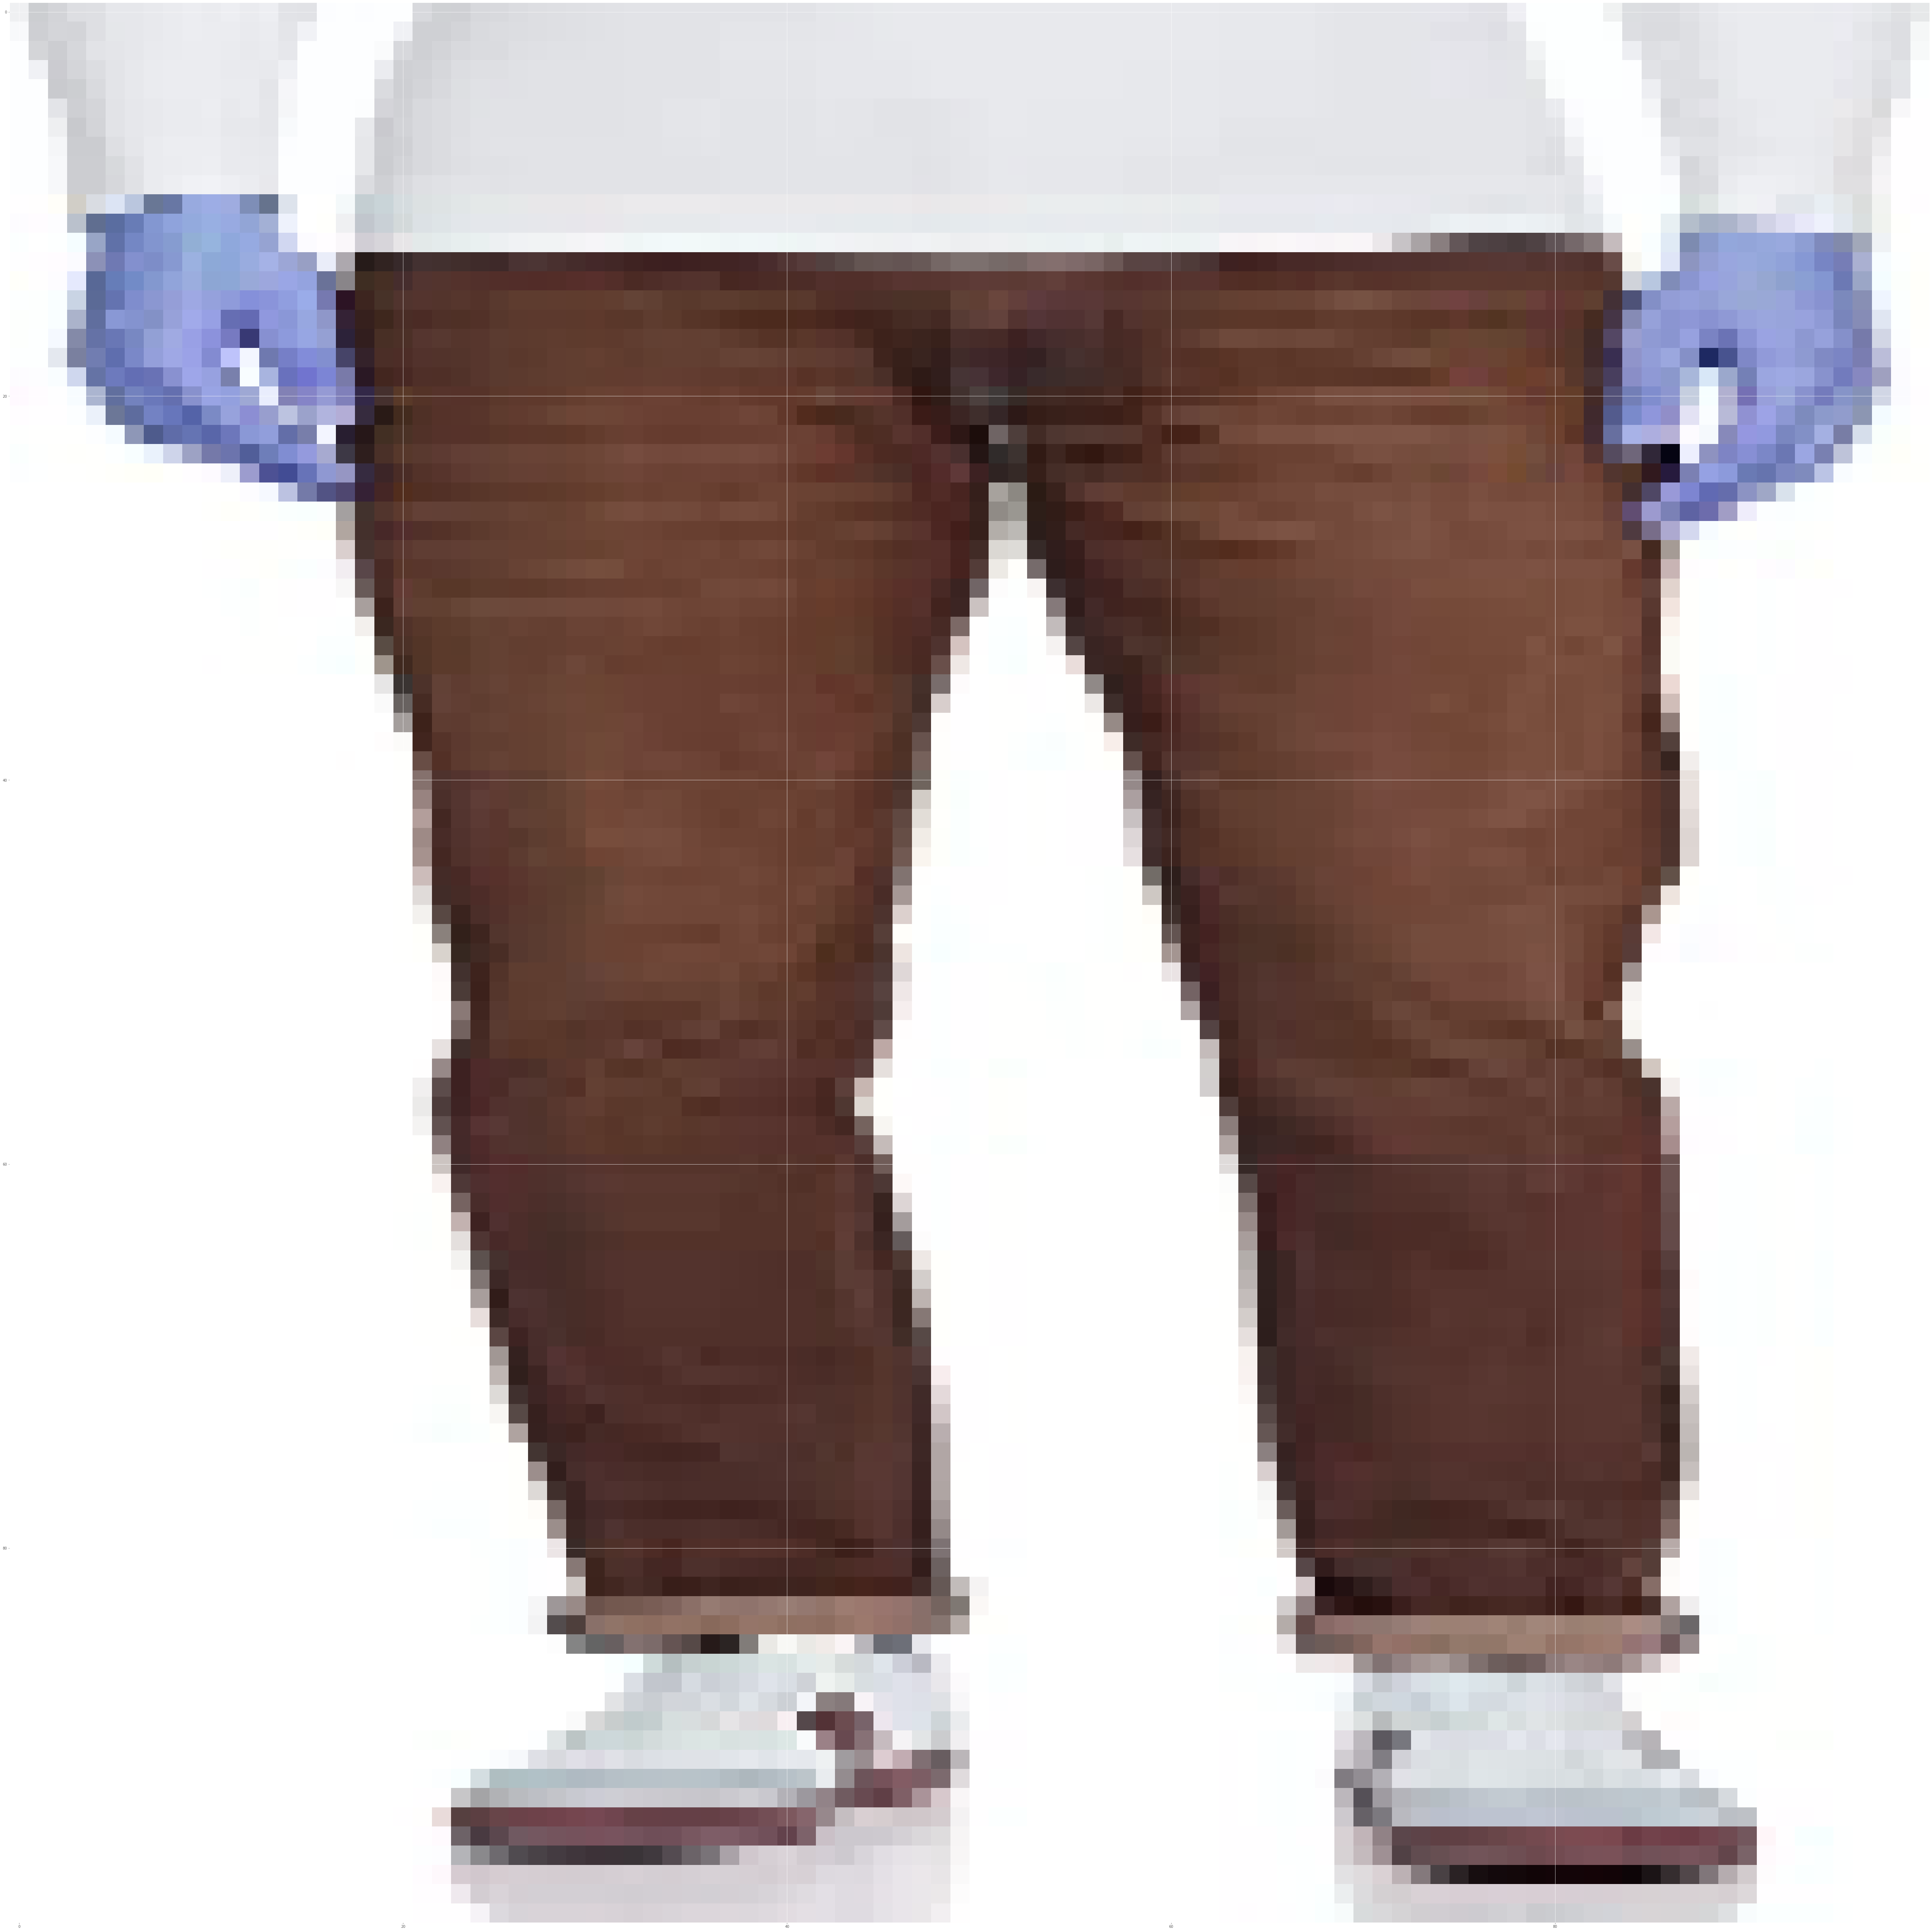

In [59]:
plot_sample(train_data, train_target, 1)

In [63]:
def plot_sample(X,index):
    plt.figure(figsize = (100,100))
    plt.imshow(X[index])
   

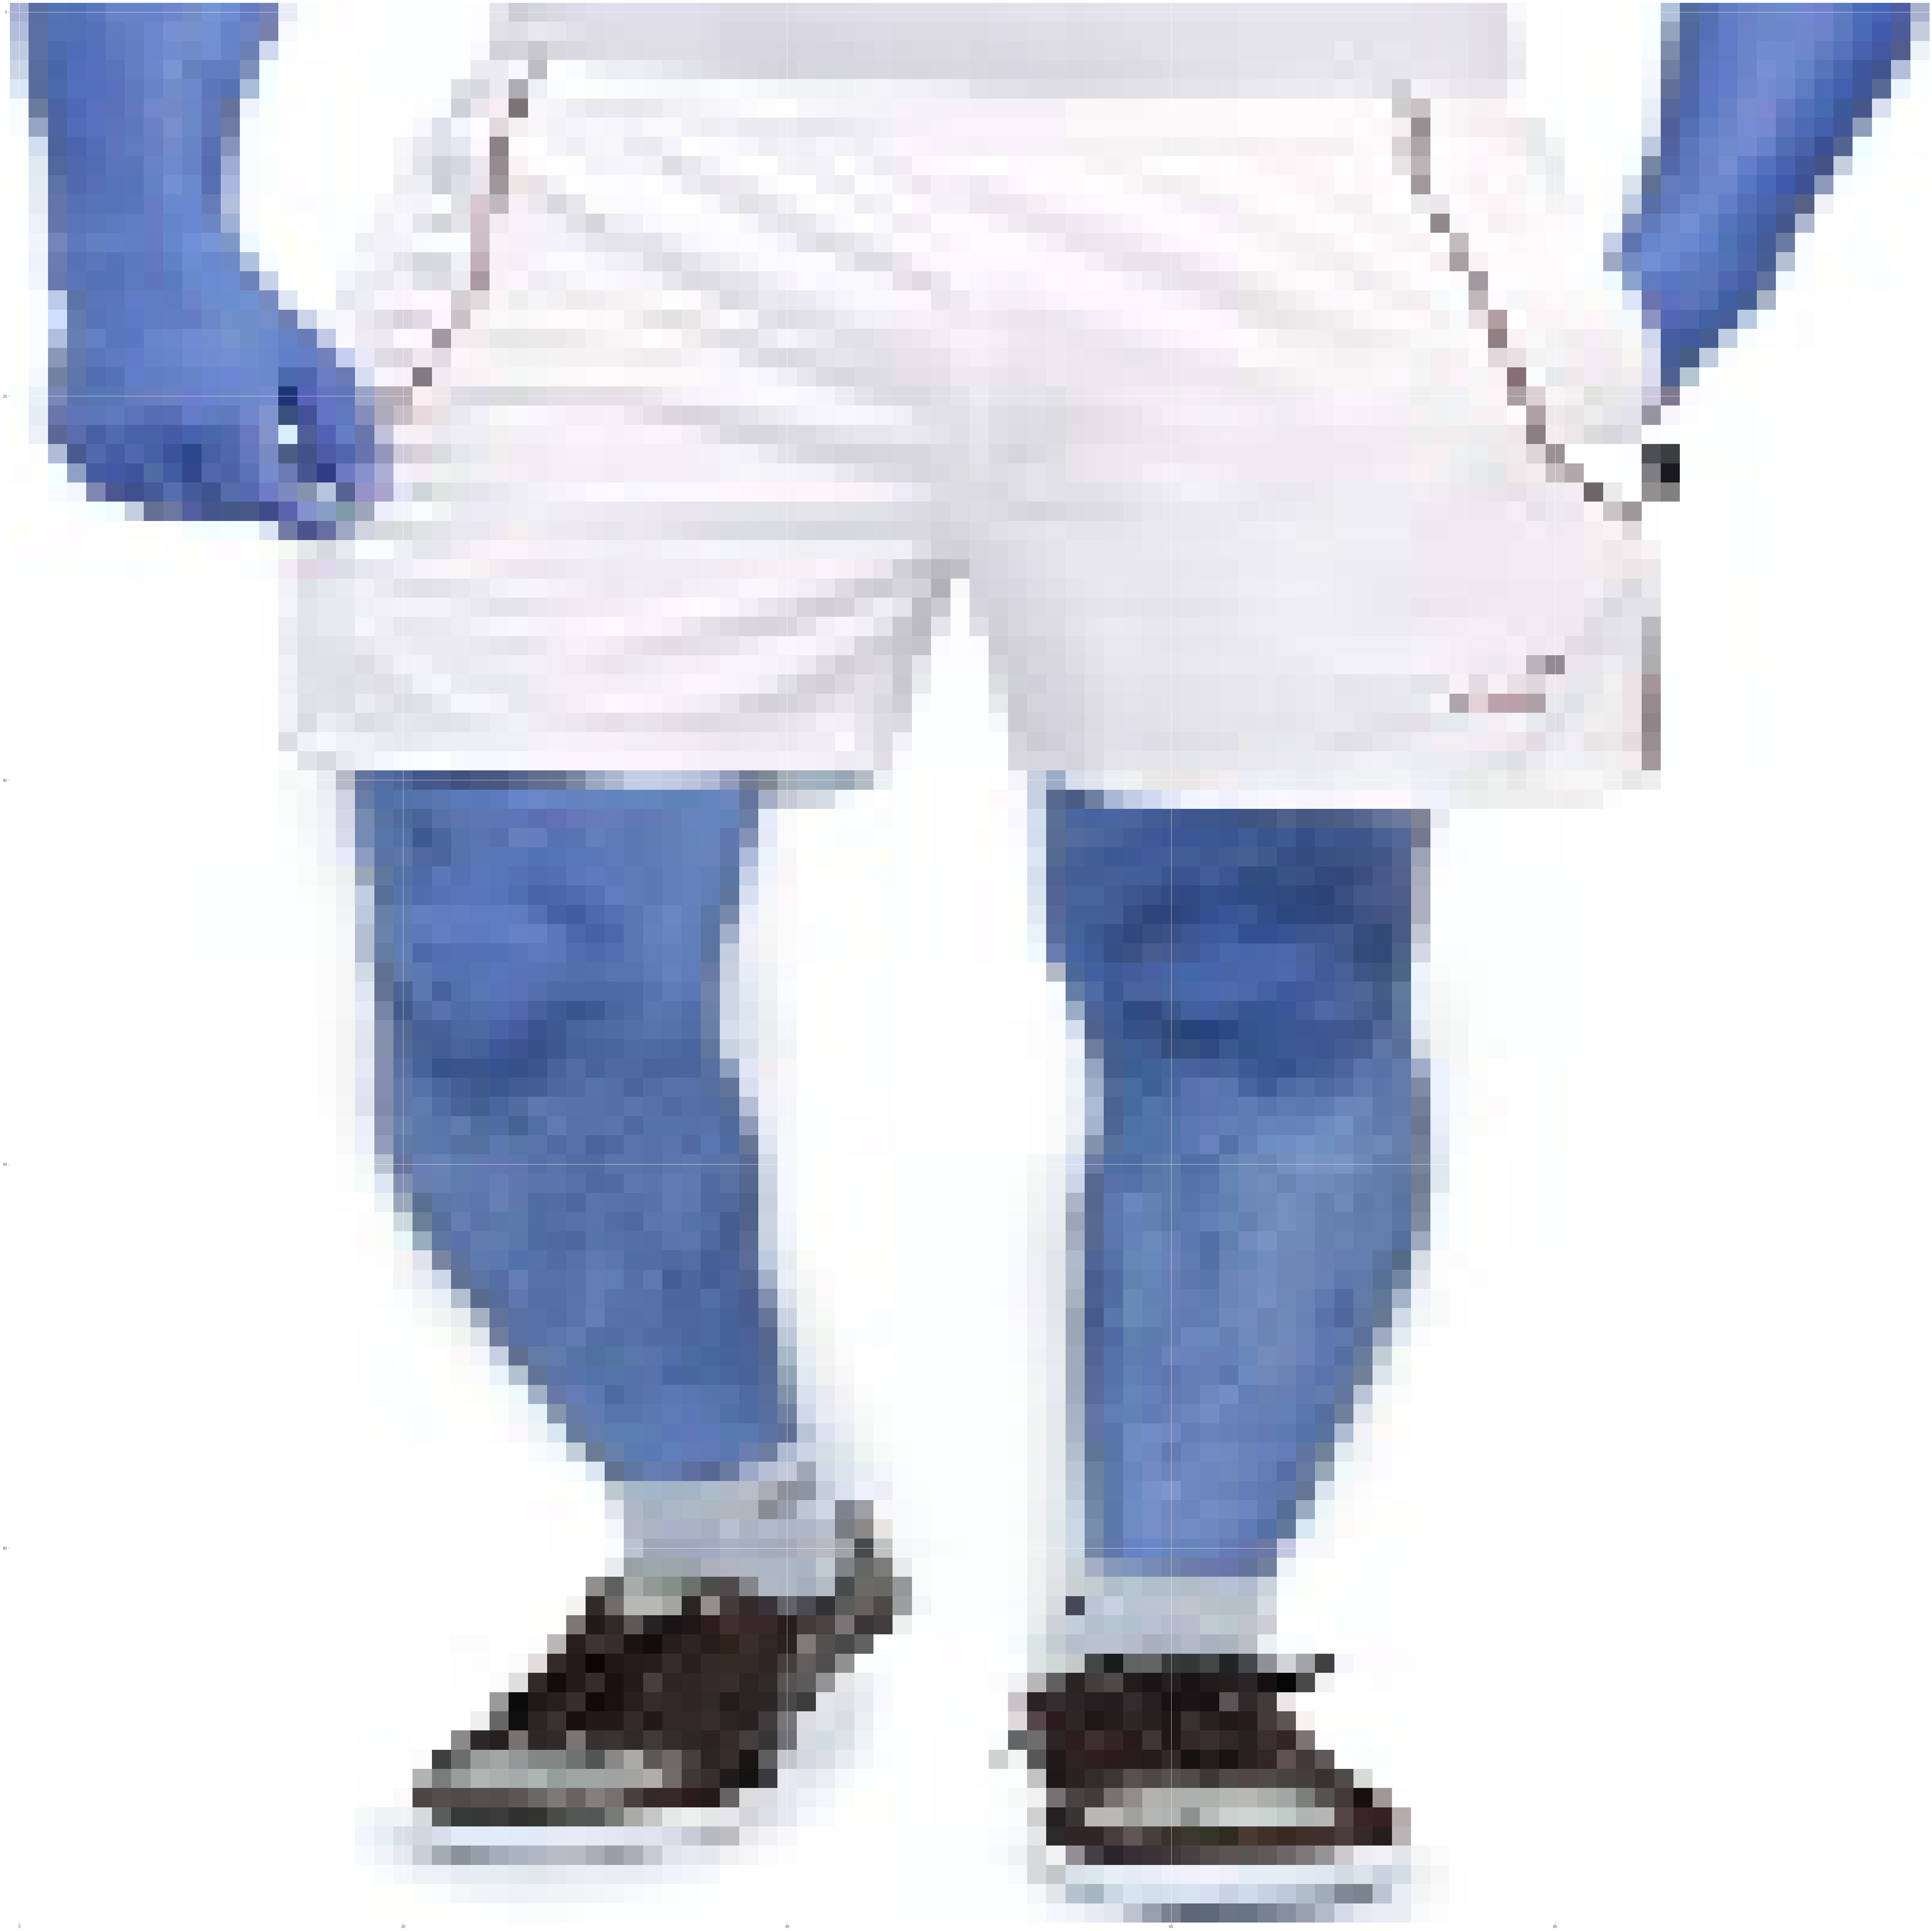

In [65]:
#visualize sample data
plot_sample(data, 1)